In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
src_file = "resource/line1.png"
src = cv2.imread(src_file,cv2.IMREAD_COLOR)

In [3]:
src.shape, src.ndim, src.dtype #영상의 크기, 차원, 데이터 형

((593, 1226, 3), 3, dtype('uint8'))

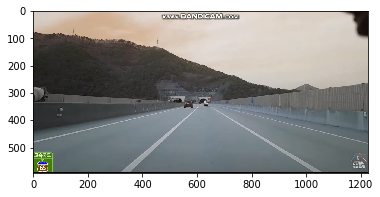

In [4]:
plt.imshow(src,cmap='gray',vmin=0,vmax =255)

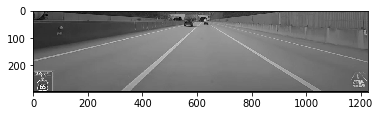

In [5]:
#roi = region of interest(필요 부분만 걸러냄)
roi =src.copy()
roi_height = roi.shape[0]
roi_width = roi.shape[1]
roi_height_start = int(roi_height/2)

#높이는 중간부터 끝까지, 넓이는 처음부터 끝까지
roi_origin = roi[roi_height_start:roi_height,0:roi_width]
roi = cv2.cvtColor(roi_origin,cv2.COLOR_BGR2GRAY)
plt.imshow(roi,cmap='gray',vmin=0,vmax =255)

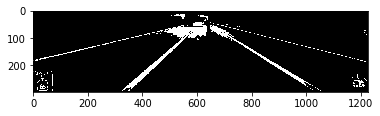

In [6]:
#roi 영상을 thresholding = 픽셀의 밝기를 재조정
#밝기가 160 이상 => 밝기 = 255
#발기가 160 미만 => 밝기 = 0
ret, thr = cv2.threshold(roi,150,255, cv2.THRESH_BINARY)

#thresholding된 이미지의 edge를 찾아주는 canny edge algorithm
edge = cv2.Canny(thr,100,150)
plt.imshow(thr,cmap='gray',vmin=0,vmax =255)


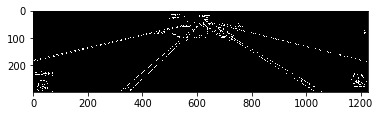

In [7]:
plt.imshow(edge,cmap='gray',vmin=0,vmax =255)

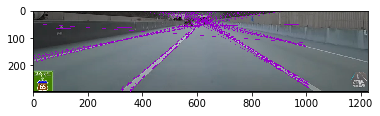

In [8]:
hough_threshold = 80
#hough line 개념
#http://www.gisdeveloper.co.kr/?p=6714 
lines = cv2.HoughLines(edge, 1,np.pi/180,80)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(roi_origin,(x1,y1),(x2,y2),(150,0,200),1)

plt.imshow(roi_origin,cmap ='gray',vmin=0,vmax=255)